# Bivariate Plotting With Seaborn

In [5]:
import pandas as pd
import os 

###  Load the Dataset

In [6]:
filename = os.path.join(os.getcwd(), "..", "..", "data", "censusData.csv")
df = pd.read_csv(filename, header=0)

### Glance at the Data

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,State-gov,112074,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Non-Female,0,0,45,United-States,<=50K
1,35,Private,32528,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Non-Female,0,0,45,United-States,<=50K
2,21,Private,270043,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
3,45,Private,168837,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,24,Canada,>50K
4,39,Private,297449,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,40,United-States,>50K


### Get the Dimensions of the Dataset

In [8]:
df.shape

(7000, 15)

## Plot Multiple Variables Using `seaborn`

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

###  Filter the Dataset

We will work with the following subset of our data: we will keep only three numeric features, one categorical feature, and one label.

In [ ]:
df_sub = df[['age', 'capital-gain', 'hours-per-week', 'education','income']].copy()

### Produce a Pairplot on the Numeric Features Using `seaborn`

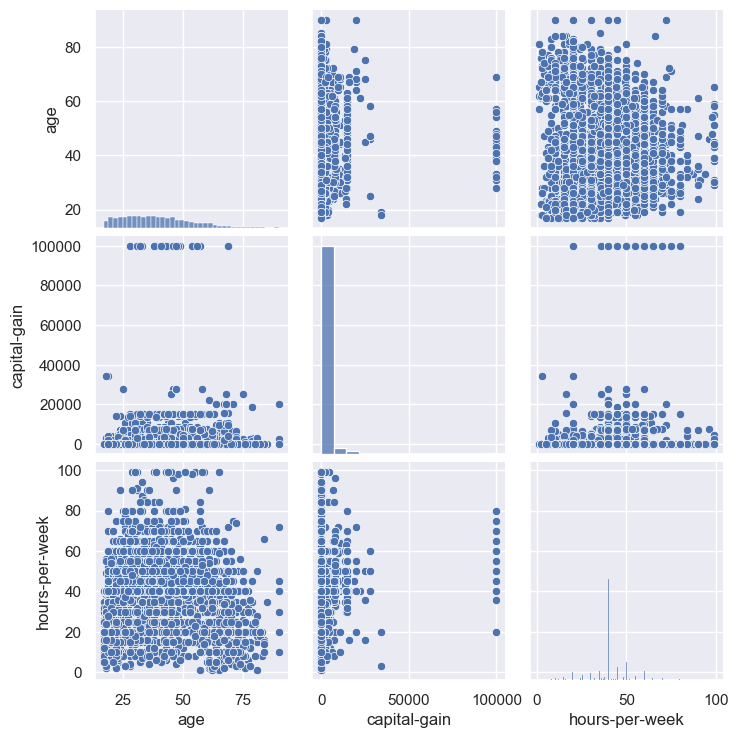

In [11]:
sns.pairplot(data=df_sub)

The pairwise scatter plots do not make obvious any straightforward relationships between the variables. It seems that `capital-gain` is concentrated at 0, so the fact that this variable has little variability may explain why we did not see strong correlation with, say, `age`. <br>
But can we conclude that the variables are independent by looking at the apparent lack of covariability between `age` and `hours-per-week`? We can make a new, better plot that will help establish this. In particular, we will modify the plot above to:
1. use two different colors based on the label value.
2. decrease the size of the points to de-clutter the display and better see if a 'tilt' characteristic of correlated features is emerging.

The label in our data signifies whether the income for the observed individual is above $50K.

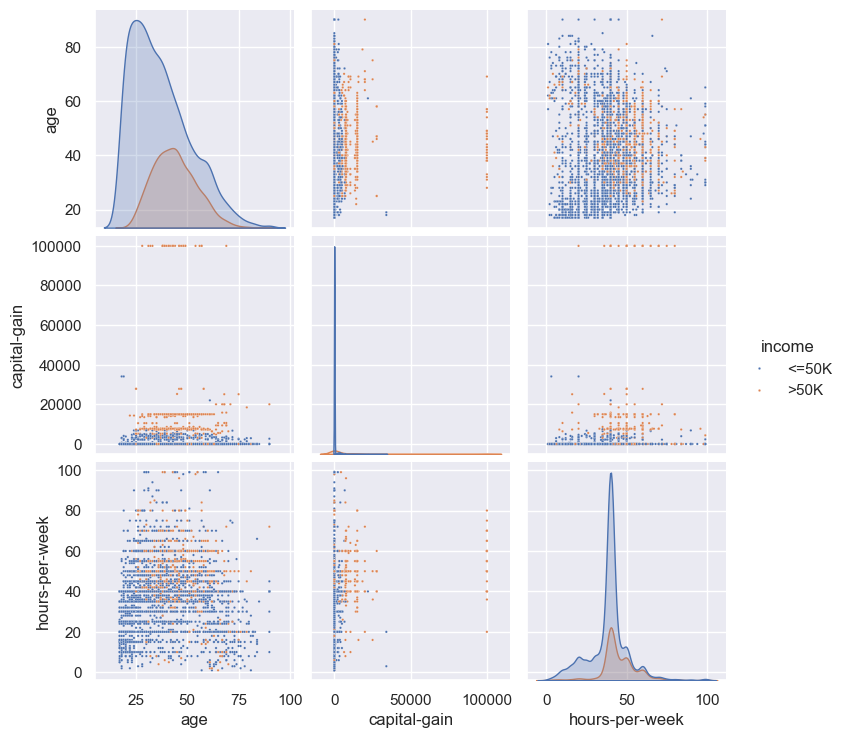

In [12]:
sns.pairplot(data=df_sub, hue = 'income', plot_kws={'s':3})

This version of the plot looks much better, in that it passes the 'sanity check' by meeting some of our expectations: for example, in the top-right corner we see that zero hours per week worked is common for extremely high and extremely low ends of the age range. This makes sense!<br>
It also makes sense that all of the 'outlier' points of very high capital gain are also points that have the '>50K' value of the label. 

### Produce a Bar Plot on the Categorical Feature 

In [13]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']

df_sub['education'] = pd.Categorical(df_sub['education'], cat_order)

<Axes: xlabel='education', ylabel='Count'>

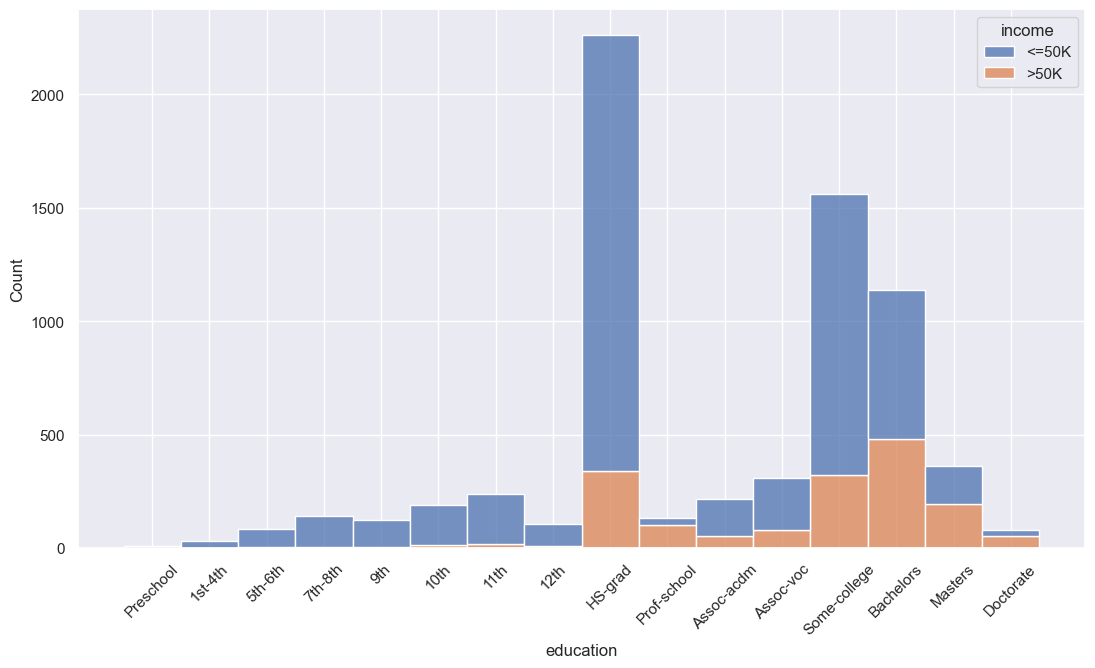

In [14]:
fig1 = plt.figure(figsize=(13,7)) 
t1 = plt.xticks(rotation=45)


sns.histplot(data=df_sub, x='education', hue='income',  multiple='stack')

In [15]:
df_sub['income'] = (df_sub['income'] =='>50K').astype(int)

In [16]:
df_sub

,age,capital-gain,hours-per-week,education,income
0,36,0,45,Doctorate,0
1,35,0,45,HS-grad,0
2,21,0,16,Some-college,0
3,45,0,24,Some-college,1
4,39,0,40,Bachelors,1
...,...,...,...,...,...
6995,31,2829,40,HS-grad,0
6996,19,0,40,10th,0
6997,44,0,40,Some-college,0
6998,45,0,40,11th,0


Another way to analyze the distribution between the two label classes for the data grouped by the education category is to use a `barplot()`:

<Axes: xlabel='education', ylabel='income'>

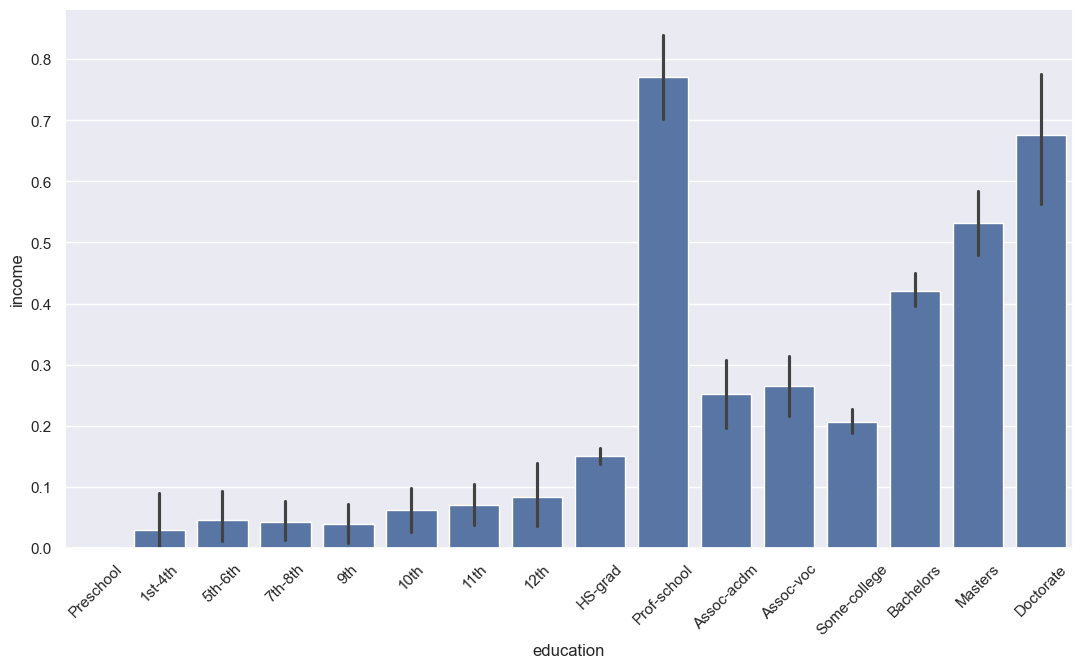

In [17]:
fig2 = plt.figure(figsize=(13,7)) 
t2 = plt.xticks(rotation=45)
sns.barplot(data = df_sub, x='education', y='income')

Here, the y-axis represents the average class label for each educational category (that is, the average of all the 0 and 1 values encountered in a particular education group). 
Note: the black lines represent the 95% confidence interval.